In [1]:
## IMPORTACIÓN GENERAL DE LIBRERIAS Y VISUALIZACIÓN DE DATOS (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as DT
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('default') 
sns.set(style="whitegrid") 
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
#Leemos el CSV
zonaprop = pd.read_csv('../../train.csv')

In [24]:
zonaprop.head(50)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,excelente,vigilancia
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0,0,0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0,1,0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0,0,1
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0,0,1
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0,1,0
5,126147,departamento en venta taxqueña,"amplio departamento, estancia de sala y comedo...",Apartamento,Condominio Tlalpan 2B,Coyoacán,Distrito Federal,5.0,2.0,1.0,...,-99.148475,2014-03-18 00:00:00,0.0,0.0,0.0,0.0,1.0,1100000.0,1,0
6,139233,de oportunidad casa en san lorenzo,"ubicada en esquina, pertenece san lorenzo agen...",Casa,NaN,Oaxaca de Juárez,Oaxaca,NaN,3.0,1.0,...,-96.803504,2016-02-23 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0,0,0
7,5013,casa emilia en venta en selvamar playa del carmen,casa emilia en venta playa del carmenfracciona...,Casa,condominio el trebol,Playa del Carmen,Quintana Roo,2.0,4.0,2.0,...,-87.037968,2016-10-20 00:00:00,0.0,0.0,0.0,0.0,0.0,4200000.0,0,0
8,44962,pre- venta preciosos depas 2 recamaras con sub...,<p>pre-venta de preciosos departamento ecologi...,Apartamento,BUENAVISTA DEPTOS CON SUBSIDIO,Villa de Alvarez,Colima,1.0,2.0,1.0,...,NaN,2014-01-06 00:00:00,0.0,0.0,0.0,1.0,1.0,310000.0,0,0
9,134537,terreno,"terreno de 5.500m2 bardeado, uso de suelo h-20...",Terreno,Av. Morelos,Ixtapaluca,Edo. de México,NaN,NaN,NaN,...,-98.887000,2016-12-22 00:00:00,0.0,0.0,0.0,0.0,0.0,6200000.0,0,0


In [19]:
zonaprop['excelente'] = 0

In [20]:
zonaprop.loc[zonaprop.descripcion.str.contains('vigilancia', na=False), 'vigilancia'] = 1

In [22]:
zonaprop['vigilancia'].value_counts()

0    202110
1     37890
Name: vigilancia, dtype: int64

In [ ]:
zonaprop['vigilancia'] = 0

In [ ]:
zonaprop.loc[zonaprop.descripcion.str.contains('excelente', na=False), 'excelente'] = 1

In [23]:
zonaprop['excelente'].value_counts()

0    171029
1     68971
Name: excelente, dtype: int64

In [25]:
zonaprop['esquina'] = 0

In [26]:
zonaprop.loc[zonaprop.descripcion.str.contains('esquina', na=False), 'esquina'] = 1

In [27]:
zonaprop['esquina'].value_counts()

0    231165
1      8835
Name: esquina, dtype: int64

In [28]:
zonaprop['remodelada'] = 0

In [29]:
zonaprop.loc[zonaprop.descripcion.str.contains('remodelada', na=False), 'remodelada'] = 1

In [30]:
zonaprop['remodelada'].value_counts()

0    233621
1      6379
Name: remodelada, dtype: int64

In [31]:
zonaprop['lujo'] = 0

In [32]:
zonaprop.loc[zonaprop.descripcion.str.contains('lujo', na=False), 'lujo'] = 1

In [33]:
zonaprop['lujo'].value_counts()

0    226184
1     13816
Name: lujo, dtype: int64

In [34]:
zonaprop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 28 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

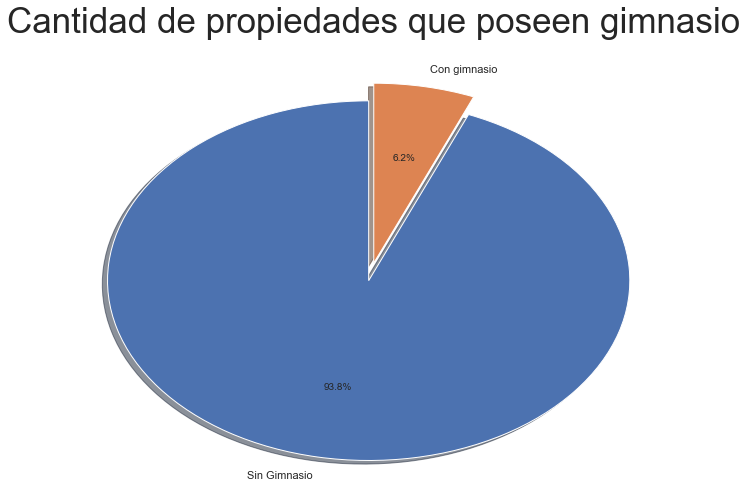

In [5]:
#Obtenemos las cantidades de propiedades con gimnasio
conGimnasio = (zonaprop[zonaprop['gimnasio'] == 1]).gimnasio.count()
sinGimnasio = (zonaprop[zonaprop['gimnasio'] == 0]).gimnasio.count()

sizes = [sinGimnasio, conGimnasio]
nombres = ['Sin Gimnasio','Con gimnasio']

# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))
plt.title('Cantidad de propiedades que poseen gimnasio', fontsize=35)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.1, 0))
plt.show()

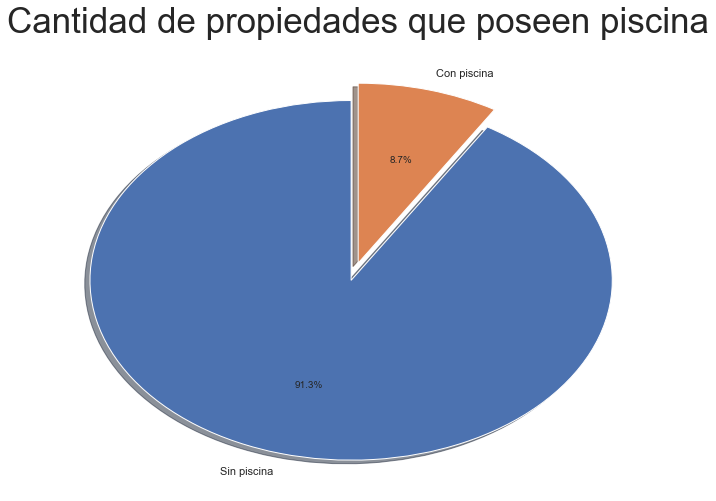

In [6]:
#Obtenemos las cantidades de propiedades con piscina
conPiscina = (zonaprop[zonaprop['piscina'] == 1]).gimnasio.count()
sinPiscina = (zonaprop[zonaprop['piscina'] == 0]).gimnasio.count()

sizes = [sinPiscina, conPiscina]
nombres = ['Sin piscina','Con piscina']

# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))
plt.title('Cantidad de propiedades que poseen piscina', fontsize=35)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.1, 0))
plt.show()

In [7]:
zonaprop['habitaciones'].value_counts()

3.0     121887
2.0      57808
4.0      25068
1.0       5069
5.0       4596
6.0       1669
7.0        539
8.0        398
10.0       316
9.0        179
Name: habitaciones, dtype: int64

Text(0,0.5,'Cantidad de propiedades')

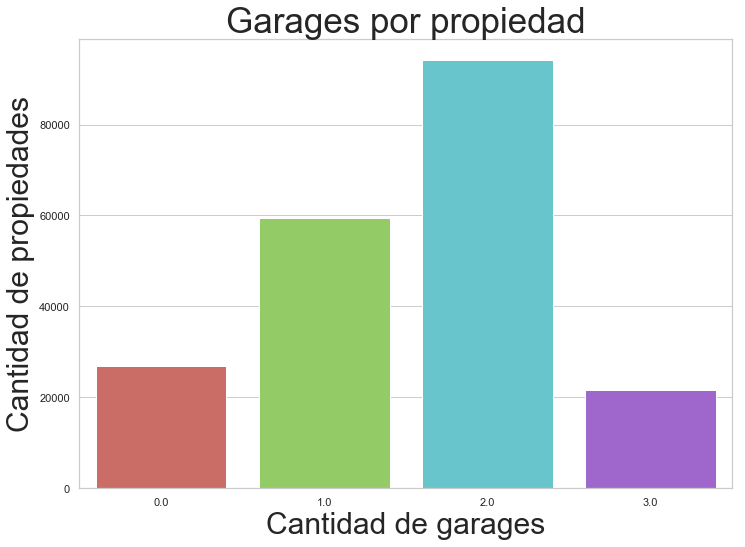

In [8]:
## GRAFICAMOS LA CANTIDAD DE GARAGES QUE TIENEN LAS PROPIEDADES.
#zonaprop['garages'].value_counts()
#2.0    94167
#1.0    59464
#0.0    26926
#3.0    21678

cantidad_de_garages_por_propiedad = list([0, 1, 2, 3])
garagesdf = zonaprop[zonaprop['garages'].isin(cantidad_de_garages_por_propiedad)]
garagesdf['garages'].value_counts()

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.countplot(x="garages", data=garagesdf, palette="hls")
g.set_title("Garages por propiedad", fontsize=35)
g.set_xlabel("Cantidad de garages", fontsize=30)
g.set_ylabel("Cantidad de propiedades", fontsize=30)

Text(0,0.5,'Cantidad de propiedades')

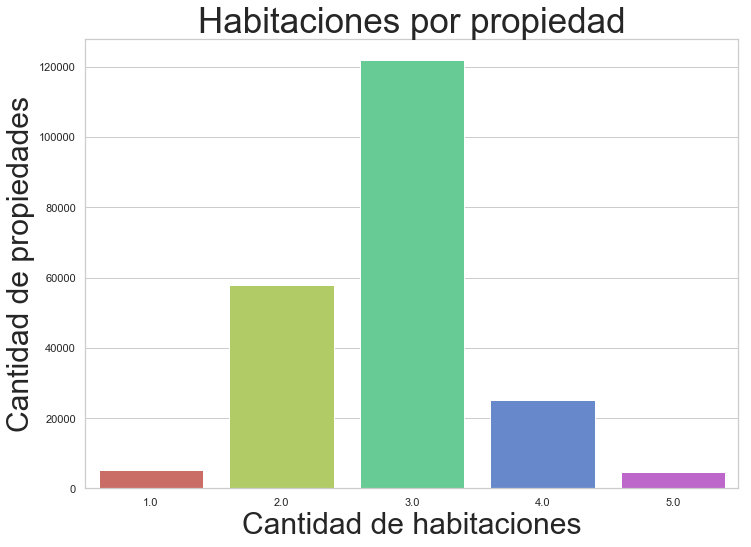

In [9]:
## GRAFICAMOS LA CANTIDAD DE HABITACIONES QUE TIENEN LAS PROPIEDADES.
#zonaprop['habitaciones'].value_counts()
#3.0     121887
#2.0      57808
#4.0      25068
#1.0       5069
#5.0       4596

cantidad_de_habitaciones_por_propiedad = list([0, 1, 2, 3, 4, 5])
habitacionesdf = zonaprop[zonaprop['habitaciones'].isin(cantidad_de_habitaciones_por_propiedad)]
habitacionesdf['garages'].value_counts()

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.countplot(x="habitaciones", data=habitacionesdf, palette="hls")
g.set_title("Habitaciones por propiedad", fontsize=35)
g.set_xlabel("Cantidad de habitaciones", fontsize=30)
g.set_ylabel("Cantidad de propiedades", fontsize=30)

In [10]:
zonaprop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [11]:
#zonaprop['habitaciones'].value_counts()

In [12]:
zonaprop['provincia'].value_counts()

Distrito Federal         58790
Edo. de México           41607
Jalisco                  21238
Querétaro                16988
Nuevo León               15324
Puebla                   10421
San luis Potosí           8447
Yucatán                   7928
Morelos                   7337
Veracruz                  5762
Quintana Roo              4756
Chihuahua                 4590
Coahuila                  3695
Baja California Norte     3220
Sonora                    2988
Guanajuato                2860
Guerrero                  2678
Hidalgo                   2521
Michoacán                 2471
Tamaulipas                2303
Durango                   2275
Sinaloa                   1806
Aguascalientes            1753
Baja California Sur       1700
Nayarit                   1352
Chiapas                   1126
Colima                    1008
Tabasco                    994
Tlaxcala                   839
Oaxaca                     711
Campeche                   263
Zacatecas                   94
Name: pr

In [13]:
zonaprop['tipodepropiedad'].value_counts()

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Garage                                1
Hospedaje                             1
Name: tipodepropiedad, dtype: int64

In [14]:
zonaprop['ciudad'].value_counts()

Querétaro                        12646
Benito Juárez                    11014
Zapopan                          10360
San Luis Potosí                   7925
Mérida                            7162
Monterrey                         6946
Alvaro Obregón                    6633
Cuauhtémoc                        6614
Naucalpan de Juárez               6554
Miguel Hidalgo                    5795
Atizapán de Zaragoza              5783
Tlalpan                           5721
Huixquilucan                      5718
Coyoacán                          5293
Puebla                            4636
Guadalajara                       4006
San Andrés Cholula                3805
Cancún                            3779
Cuernavaca                        3775
Chihuahua                         3757
Tlalnepantla de Baz               3588
Cuautitlán Izcalli                3408
Tlajomulco de Zúñiga              3254
Gustavo A. Madero                 3141
Iztapalapa                        3093
Cuajimalpa de Morelos    

In [15]:
zonaprop['antiguedad'].value_counts()

0.0     50335
5.0     33268
10.0    28844
20.0    19904
1.0     12353
4.0      7944
3.0      5616
2.0      5059
15.0     3965
6.0      3169
30.0     3055
8.0      2418
25.0     2297
7.0      2046
12.0     1492
11.0     1434
40.0     1347
50.0     1193
9.0      1065
35.0      938
18.0      908
21.0      742
16.0      700
14.0      616
13.0      577
17.0      529
22.0      448
28.0      396
26.0      369
45.0      329
        ...  
47.0       40
55.0       38
48.0       36
46.0       31
70.0       29
41.0       27
80.0       27
53.0       17
49.0       17
65.0       17
52.0       11
58.0       10
54.0        9
75.0        6
66.0        5
59.0        5
69.0        5
67.0        4
57.0        4
63.0        4
62.0        3
56.0        3
74.0        2
68.0        2
79.0        2
61.0        2
76.0        2
71.0        1
77.0        1
64.0        1
Name: antiguedad, Length: 78, dtype: int64

In [16]:
zonaprop['usosmultiples'].value_counts()

0.0    226778
1.0     13222
Name: usosmultiples, dtype: int64

In [17]:
zonaprop['escuelascercanas'].value_counts()

0.0    133406
1.0    106594
Name: escuelascercanas, dtype: int64

In [18]:
zonaprop['centroscomercialescercanos'].value_counts()

0.0    144832
1.0     95168
Name: centroscomercialescercanos, dtype: int64

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [17]:
mapa = gpd.read_file('../../mexico/Mexico_Vialidad.shp')

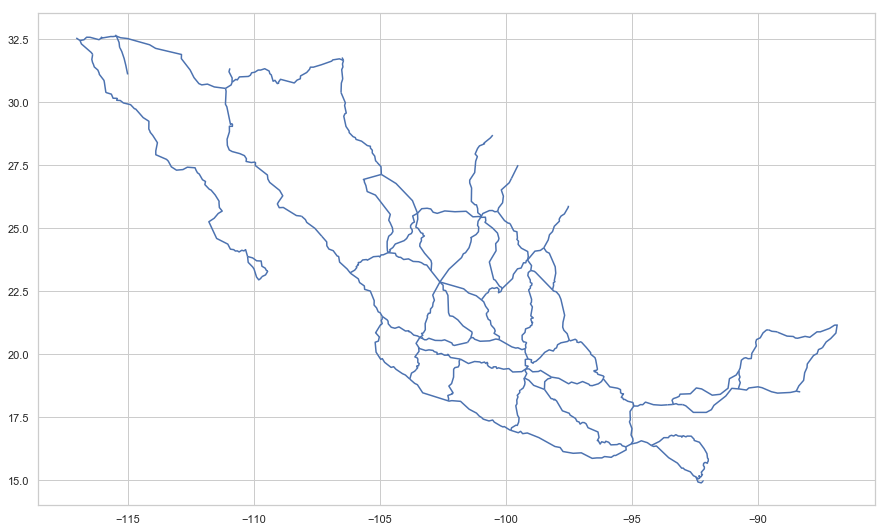

In [18]:
fig,ax = plt.subplots(figsize = (15,15))
mapa.plot(ax = ax)

In [19]:
zonaprop['lat'].fillna(0, inplace=True)
zonaprop['lng'].fillna(0, inplace=True)
## > 12.5 < 35 / < -85 > -120

In [20]:
zonaprop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           240000 non-null float64
lng                           240000 non-null float64
fecha                         240

In [21]:
zonaprop.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,0.000000,0.000000,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,0.000000,0.000000,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,0.000000,0.000000,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


In [22]:
crs = {'init': 'epsg:4326'}

In [23]:
geometry = [Point(xy) for xy in zip(zonaprop['lng'], zonaprop['lat'])]
geometry[:3]

In [24]:
geo_df = gpd.GeoDataFrame(zonaprop, crs = crs, geometry = geometry)
geo_df.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,geometry
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,0.000000,0.000000,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0,POINT (0 0)
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0,POINT (-99.2276548 19.3102045)
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,0.000000,0.000000,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0,POINT (0 0)
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0,POINT (-99.6880151 19.3018899)
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,0.000000,0.000000,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0,POINT (0 0)


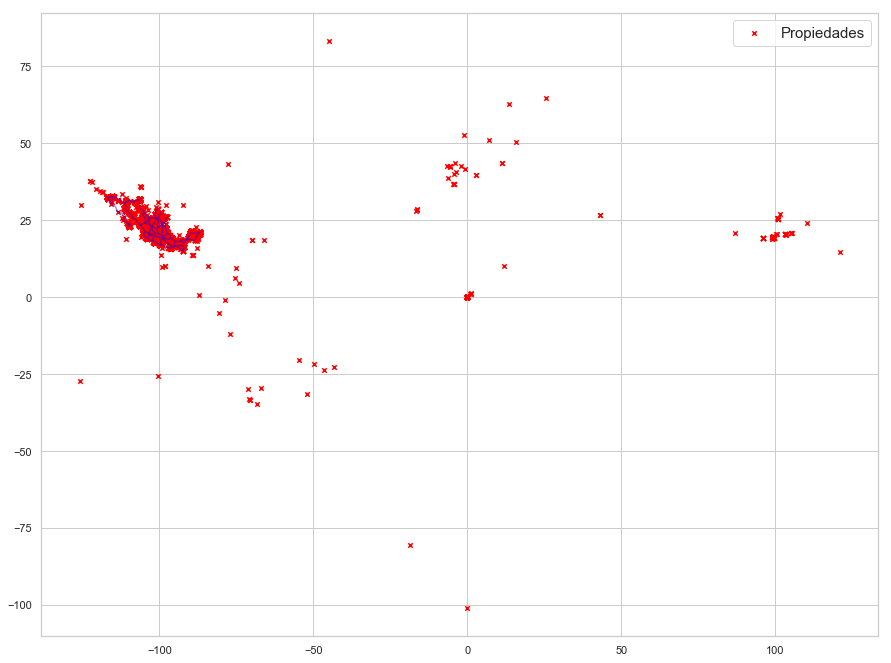

In [25]:
fig, ax = plt.subplots(figsize = (15,15))
mapa.plot(ax = ax, alpha = 0.4, color="blue")
geo_df.plot(ax = ax, markersize = 20, color = "red", marker = "x", label = "Propiedades")
plt.legend(prop={'size': 15})

In [26]:
from urllib2 import urlopen
import json
import requests
import geocoder

In [27]:
def obtenerPais(lat,lng):
    g = geocoder.mapbox(str(lat) +',' + str(lng), method='reverse', key='pk.eyJ1Ijoic2lsdmFobGFyYXZlbCIsImEiOiJjazA4cjZ2enIwMHp4M21wbHN0ZWZ1ODA3In0.DXubxUTjcwyqGzWv2517jA')
    return g.country

In [28]:
print(obtenerPais(17.143504, -96.803504))

Mexico


In [29]:
#geo_df['pais'] = geo_df.apply(lambda x: obtenerPais(x['lat'], x['lng']), axis=1)

In [30]:
#geo_df['pais'].value_counts()

In [31]:
#export_csv = geo_df.to_csv (r'zonaprop_paises.csv', index = None, header = True)

In [32]:
mexico = geo_df[(geo_df['lng'] < -85) & (geo_df['lng'] > -120) & (geo_df['lat'] > 12.5) & (geo_df['lat'] < 35)]
## > 12.5 < 35 / < -85 > -120

In [33]:
NO_mexico = geo_df[((geo_df['lng'] > -85) | (geo_df['lng'] < -120)) & ((geo_df['lat'] < 12.5) | (geo_df['lat'] > 35))]
## > 12.5 < 35 / < -85 > -120

In [34]:
mexico.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 115880 entries, 1 to 239998
Data columns (total 24 columns):
id                            115880 non-null int64
titulo                        114798 non-null object
descripcion                   115241 non-null object
tipodepropiedad               115865 non-null object
direccion                     91511 non-null object
ciudad                        115720 non-null object
provincia                     115843 non-null object
antiguedad                    96216 non-null float64
habitaciones                  104764 non-null float64
garages                       97510 non-null float64
banos                         103630 non-null float64
metroscubiertos               107268 non-null float64
metrostotales                 91026 non-null float64
idzona                        104566 non-null float64
lat                           115880 non-null float64
lng                           115880 non-null float64
fecha                        

In [35]:
paises_NO_mexico = NO_mexico[(NO_mexico['lat'] != 0) | (NO_mexico['lng'] != 0)]

In [36]:
paises_NO_mexico.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 62 entries, 3650 to 238886
Data columns (total 24 columns):
id                            62 non-null int64
titulo                        61 non-null object
descripcion                   61 non-null object
tipodepropiedad               62 non-null object
direccion                     41 non-null object
ciudad                        62 non-null object
provincia                     62 non-null object
antiguedad                    53 non-null float64
habitaciones                  57 non-null float64
garages                       45 non-null float64
banos                         55 non-null float64
metroscubiertos               58 non-null float64
metrostotales                 52 non-null float64
idzona                        53 non-null float64
lat                           62 non-null float64
lng                           62 non-null float64
fecha                         62 non-null object
gimnasio                      62 non-null

In [37]:
#asdasd['pais'] = asdasd.apply(lambda x: obtenerPais(x['lat'], x['lng']), axis=1)

In [38]:
#asdasd['pais'].value_counts()

In [39]:
#asdasd.head()

In [40]:
geometry = [Point(xy) for xy in zip(mexico['lng'], mexico['lat'])]
geometry[:3]

In [41]:
geo_df = gpd.GeoDataFrame(mexico, crs = crs, geometry = geometry)
geo_df.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,geometry
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0,POINT (-99.2276548 19.3102045)
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0,POINT (-99.6880151 19.3018899)
5,126147,departamento en venta taxqueña,"amplio departamento, estancia de sala y comedo...",Apartamento,Condominio Tlalpan 2B,Coyoacán,Distrito Federal,5.0,2.0,1.0,...,19.300612,-99.148475,2014-03-18 00:00:00,0.0,0.0,0.0,0.0,1.0,1100000.0,POINT (-99.14847480000005 19.300612)
6,139233,de oportunidad casa en san lorenzo,"ubicada en esquina, pertenece san lorenzo agen...",Casa,NaN,Oaxaca de Juárez,Oaxaca,NaN,3.0,1.0,...,17.143504,-96.803504,2016-02-23 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0,POINT (-96.80350437680001 17.1435035135)
7,5013,casa emilia en venta en selvamar playa del carmen,casa emilia en venta playa del carmenfracciona...,Casa,condominio el trebol,Playa del Carmen,Quintana Roo,2.0,4.0,2.0,...,20.672612,-87.037968,2016-10-20 00:00:00,0.0,0.0,0.0,0.0,0.0,4200000.0,POINT (-87.0379684 20.6726121)


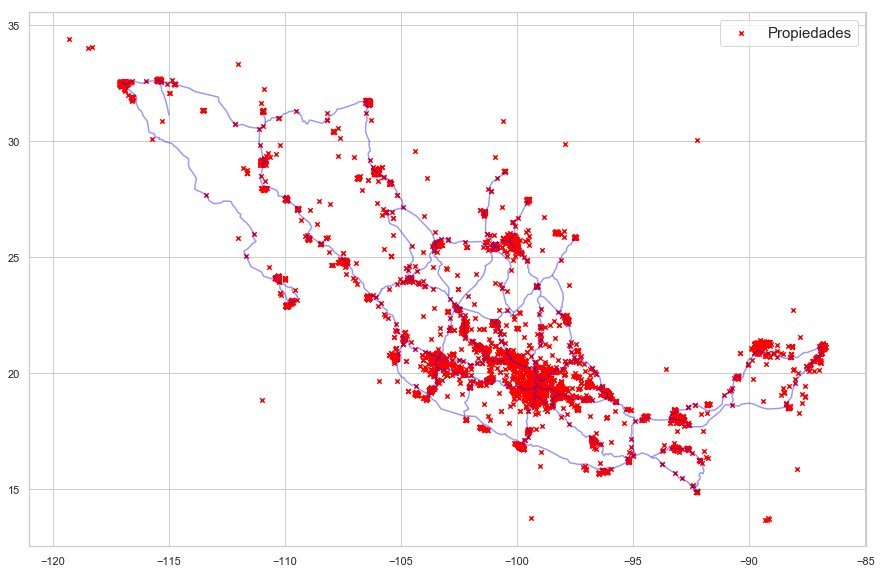

In [42]:
fig, ax = plt.subplots(figsize = (15,15))
mapa.plot(ax = ax, alpha = 0.4, color="blue")
geo_df.plot(ax = ax, markersize = 20, color = "red", marker = "x", label = "Propiedades")
plt.legend(prop={'size': 15})

In [81]:
Jalisco = mexico[mexico['provincia'] == 'Edo. de México']
Jalisco = Jalisco[(Jalisco['lat'] > 18) & (Jalisco['lat'] < 20.5)]
Jalisco = Jalisco[(Jalisco['lng'] > -100.75) & (Jalisco['lng'] < -98.5)]

In [82]:
Jalisco.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 17993 entries, 3 to 239996
Data columns (total 24 columns):
id                            17993 non-null int64
titulo                        17820 non-null object
descripcion                   17914 non-null object
tipodepropiedad               17992 non-null object
direccion                     15274 non-null object
ciudad                        17979 non-null object
provincia                     17993 non-null object
antiguedad                    16083 non-null float64
habitaciones                  16739 non-null float64
garages                       15049 non-null float64
banos                         16456 non-null float64
metroscubiertos               16716 non-null float64
metrostotales                 14384 non-null float64
idzona                        16881 non-null float64
lat                           17993 non-null float64
lng                           17993 non-null float64
fecha                         17993 non-nu

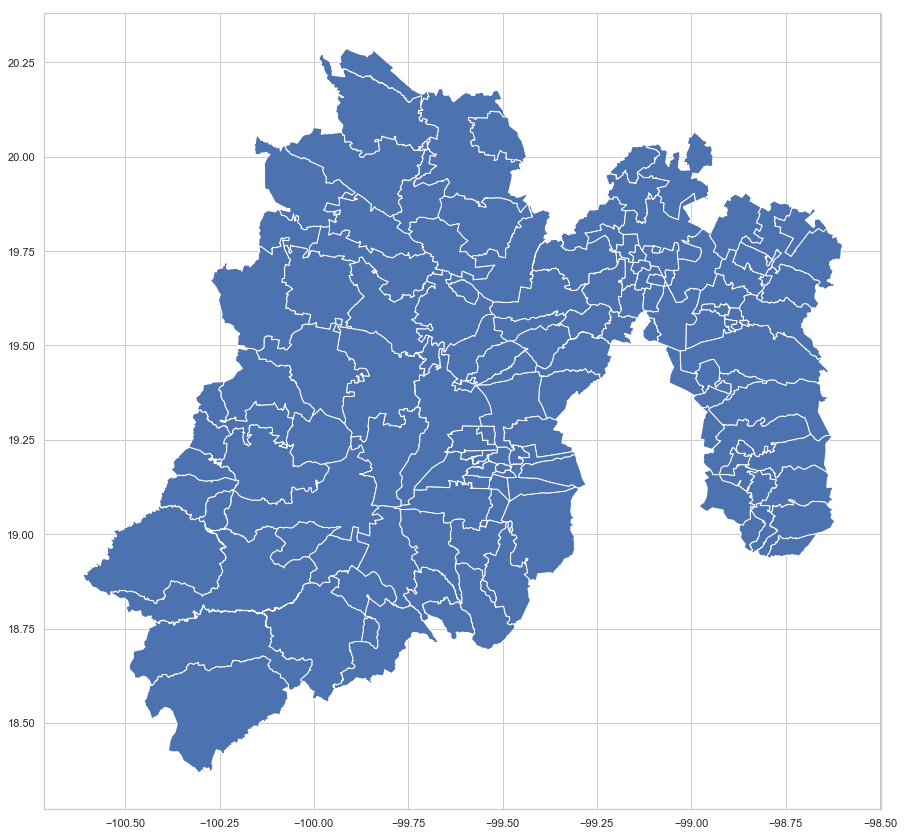

In [83]:
jalisco_mapa = gpd.read_file('../../shps/mex/mex_municipal.shp')
fig,ax = plt.subplots(figsize = (15,15))
jalisco_mapa.plot(ax = ax)

In [84]:
geometry = [Point(xy) for xy in zip(Jalisco['lng'], Jalisco['lat'])]
geometry[:3]

geo_df = gpd.GeoDataFrame(Jalisco, crs = crs, geometry = geometry)
geo_df.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,geometry
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0,POINT (-99.6880151 19.3018899)
9,134537,terreno,"terreno de 5.500m2 bardeado, uso de suelo h-20...",Terreno,Av. Morelos,Ixtapaluca,Edo. de México,NaN,NaN,NaN,...,19.316000,-98.887000,2016-12-22 00:00:00,0.0,0.0,0.0,0.0,0.0,6200000.0,POINT (-98.887 19.316)
15,201923,casa en venta lomas verdes naucalpan,"<p>casa en dos niveles, 3 recámaras la princip...",Casa,NaN,Naucalpan de Juárez,Edo. de México,NaN,3.0,2.0,...,19.516583,-99.256028,2015-01-13 00:00:00,0.0,0.0,0.0,0.0,0.0,3650000.0,POINT (-99.25602838397026 19.51658306403558)
34,173573,casa en venta lomas de la herradura,"casa iluminada, con buena distribucion, 350m2 ...",Casa,PASEO DE LA HERRADURA 00,Huixquilucan,Edo. de México,20.0,4.0,NaN,...,19.408373,-99.267617,2016-11-19 00:00:00,0.0,1.0,0.0,1.0,1.0,7900000.0,POINT (-99.2676171 19.4083735)
50,134758,"hermosa casa en rancho san luis, metepec cv278",<p>hermosa casa habitación en colonia rancho s...,Casa,NaN,Metepec,Edo. de México,5.0,3.0,NaN,...,19.251610,-99.567957,2015-07-02 00:00:00,0.0,0.0,0.0,0.0,0.0,1490000.0,POINT (-99.56795655190945 19.25161030119175)


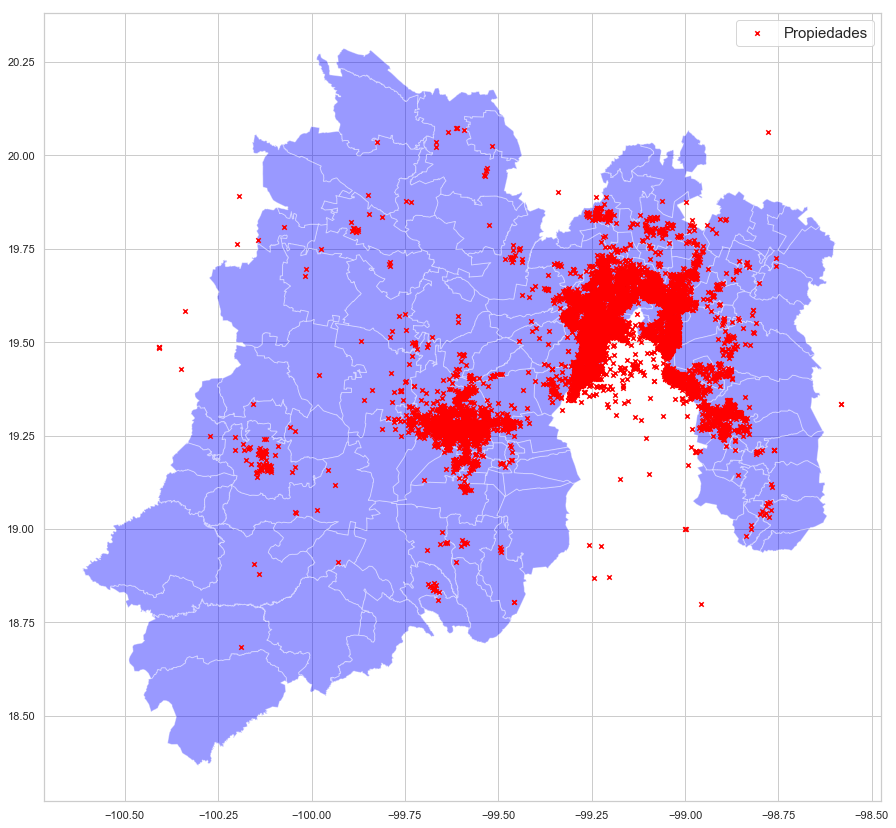

In [85]:
fig, ax = plt.subplots(figsize = (15,15))
jalisco_mapa.plot(ax = ax, alpha = 0.4, color="blue")
geo_df.plot(ax = ax, markersize = 20, color = "red", marker = "x", label = "Propiedades")
plt.legend(prop={'size': 15})